# Library

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Functions

In [6]:
def show_dtypes(data):
    print(data.dtypes)
    
def show_data(data):
    data = data.head()
    return data

def show_dimensions(data):
    print('Number of rows {}'.format(data.shape[0]))
    print('Number of columns {}'.format(data.shape[1]))
    return None

# Extration

In [4]:
data = pd.read_csv('datasets/bank.csv', sep=';')

In [7]:
show_data(data)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [10]:
show_dtypes(data)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [12]:
show_dimensions(data)

Number of rows 4521
Number of columns 17


# Transformation

In [13]:
df_filter = data.loc[((data['marital'] == 'married') | (data['marital'] == 'single')) & ((data['education'] == 'primary') | (data['education'] == 'secondary'))][['age', 'job', 'marital', 'education', 'housing', 'loan']]

In [14]:
show_dimensions(df_filter)

Number of rows 2635
Number of columns 6


In [15]:
df_filter[['marital', 'age']].groupby(['marital']).mean()

,age
marital,
married,43.779826
single,33.476540


In [17]:
by_job = df_filter[['age', 'job']].groupby(['job']).mean()
by_job['age'] = by_job['age'].astype(int)

In [19]:
altura = []
for i in by_job['age']:
    altura.append(i)
    
posicao = []
for i in range(0,12,1):
    posicao.append(i)

# Load

<BarContainer object of 2635 artists>

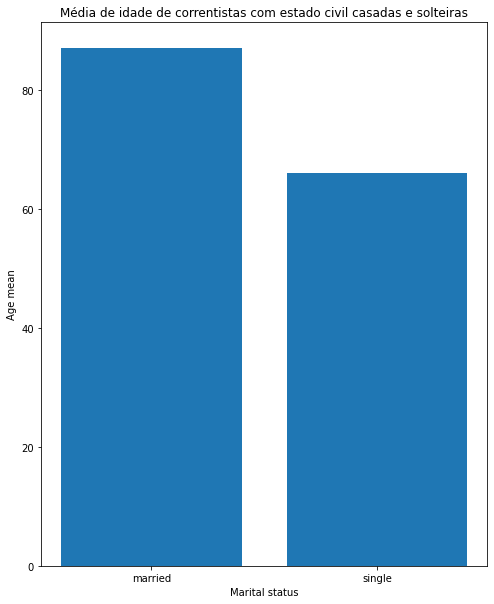

In [20]:
# Gráfico com a media de idade dos correntistas pelo estado civil
plt.figure(figsize=(8,10))
plt.title('Média de idade de correntistas com estado civil casadas e solteiras')
plt.xlabel('Marital status')
plt.ylabel('Age mean')
plt.bar(df_filter['marital'], df_filter['age'])

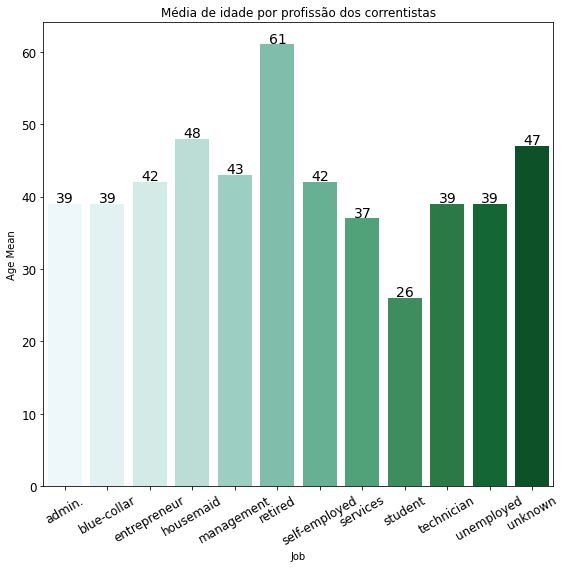

In [21]:
# Gráfico com a media de idade dos correntistas por profissão
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title('Média de idade por profissão dos correntistas')
sns.barplot(x=by_job.index,y=by_job['age'], ax=ax, data=by_job, palette='BuGn')
ax.set_xlabel('Job')
ax.set_ylabel('Age Mean')
ax.tick_params(labelsize=12)
ax.set_xticklabels(by_job.index, rotation=30)
for i in range(12):
    ax.text(x=posicao[i]-0.2, y=altura[i]+0.2, s=str(altura[i]), fontsize=14)
fig.tight_layout()
